https://data.mendeley.com/datasets/wj9rwkp9c2/1  Rashid, Ahlam (2020), “Diabetes Dataset”, Mendeley Data, V1, doi: 10.17632/wj9rwkp9c2.1

In [1]:
!wget https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded

--2025-02-21 04:02:14--  https://data.mendeley.com/public-files/datasets/wj9rwkp9c2/files/2eb60cac-96b8-46ea-b971-6415e972afc9/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd [following]
--2025-02-21 04:02:15--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/e205d80e-2bc6-49ed-bfcc-4215b6b516fd
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.68.186, 3.5.64.251, 3.5.67.174, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|3.5.68.186|:443... conn

In [2]:
!pip install shap

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/content/file_downloaded')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
df['ID'].nunique()

800

In [7]:
df['CLASS'].nunique()

5

In [8]:
df['CLASS'].value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1



Y= Yes, N = No, P = Prediabetes.
Expected 3 Classes, Got 5.

In [9]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

There are spaces in front of Y and N. Let's strip those.

In [10]:
df['CLASS'] = df['CLASS'].str.replace(' ', '')
df['CLASS'].value_counts()

,count
CLASS,
Y,844
N,103
P,53


In [11]:
df['Gender'].nunique()

3

In [12]:
df['Gender'].value_counts()

,count
Gender,
M,565
F,434
f,1


In [13]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [14]:
df['Gender'] = df['Gender'].apply(str.upper)
df['Gender'].value_counts()

,count
Gender,
M,565
F,435


<Axes: xlabel='Gender'>

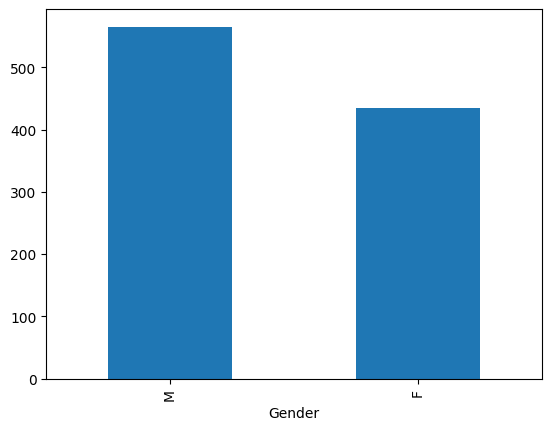

In [15]:
df['Gender'].value_counts().plot(kind = 'bar')

In [16]:
df['AGE'].nunique()

50

### Feature Engineering:
Create Age Range buckets to represent general healthcare reporting formats

In [17]:
age_range_buckets = ["[{0} - {1})".format(age, age + 10) for age in range(20, 100, 10)]
age_range_buckets

['[20 - 30)',
 '[30 - 40)',
 '[40 - 50)',
 '[50 - 60)',
 '[60 - 70)',
 '[70 - 80)',
 '[80 - 90)',
 '[90 - 100)']

In [18]:
df['age_range'] = pd.cut(x=df['AGE'], bins=8, labels=age_range_buckets)
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30)
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40)


In [19]:
df['age_range'].value_counts()

,count
age_range,
[60 - 70),476
[70 - 80),274
[50 - 60),79
[40 - 50),58
[30 - 40),54
[80 - 90),36
[90 - 100),19
[20 - 30),4


In [20]:
# Select only numeric columns for correlation calculation
#correlation_values = df.corr()
import numpy as np
correlation_values = df.select_dtypes(include=np.number).corr()

In [21]:
correlation_values

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
ID,1.000000,0.064920,-0.065980,-0.094434,-0.102457,-0.007571,0.044390,-0.055908,0.026231,-0.064305,0.146142,0.049409
No_Pation,0.064920,1.000000,-0.088006,-0.019160,0.000692,-0.032057,-0.030171,-0.039885,-0.013357,-0.003171,0.113754,0.017719
AGE,-0.065980,-0.088006,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,-0.094434,-0.019160,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,-0.102457,0.000692,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,-0.007571,-0.032057,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.044390,-0.030171,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,-0.055908,-0.039885,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,0.026231,-0.013357,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,-0.064305,-0.003171,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322


<Axes: >

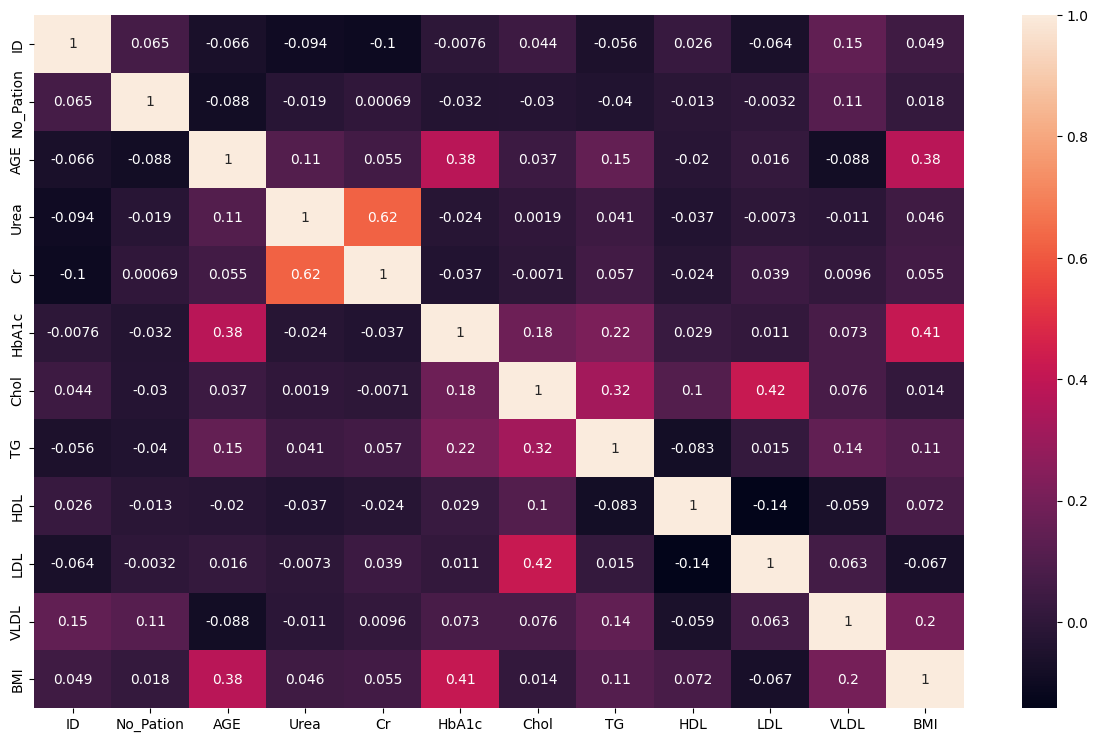

In [22]:
plt.figure(figsize=(15,9))
sns.heatmap(correlation_values,annot = True)

In [23]:
# No_Pation nuninique. Number of Partition is most likely an ID

df['No_Pation'].nunique()

961

In [24]:
df2 = df.drop(['ID','No_Pation','AGE'], axis=1) # since we have age range
df2.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,age_range
0,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
1,M,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,[20 - 30)
2,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
3,F,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,[60 - 70)
4,M,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,[30 - 40)


###Additional Visualization to understand the data (by ChristineM)

<ipython-input-25-b8b201c82908>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_counts = df.groupby(['age_range', 'CLASS']).size().unstack()


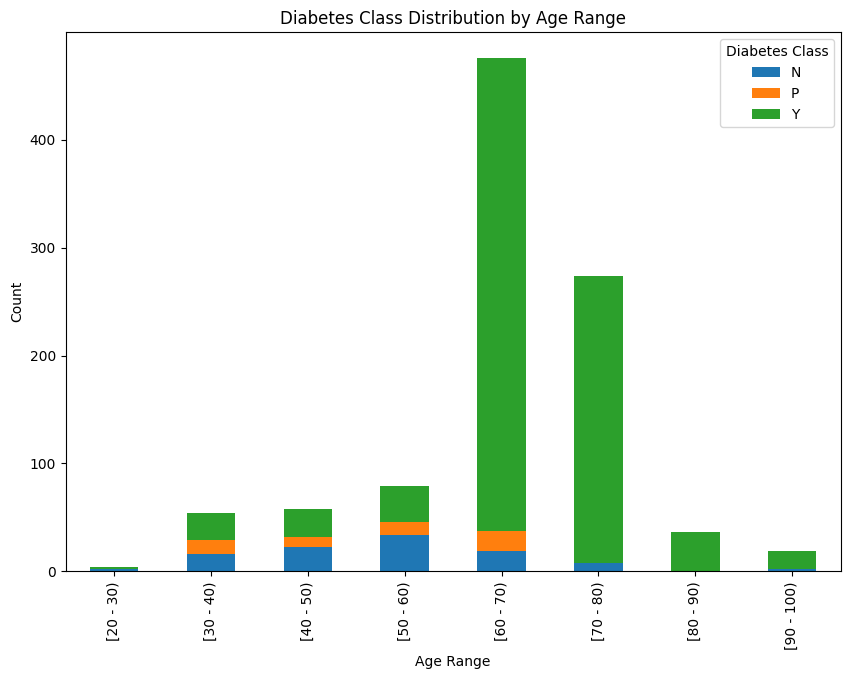

In [25]:
# Count the number of each class in each age range
age_class_counts = df.groupby(['age_range', 'CLASS']).size().unstack()

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 7))
age_class_counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Diabetes Class Distribution by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(title='Diabetes Class')
plt.show()



###Observation: (by ChristineM)
Majority that have Diabetes is between the range of 60-80. THose that are in range 80-90 is higher than 50-60, though bar in the latter is higher but Y with diabetes is lower.

###Adding Gender in the visualization to see trend (by ChristineM)

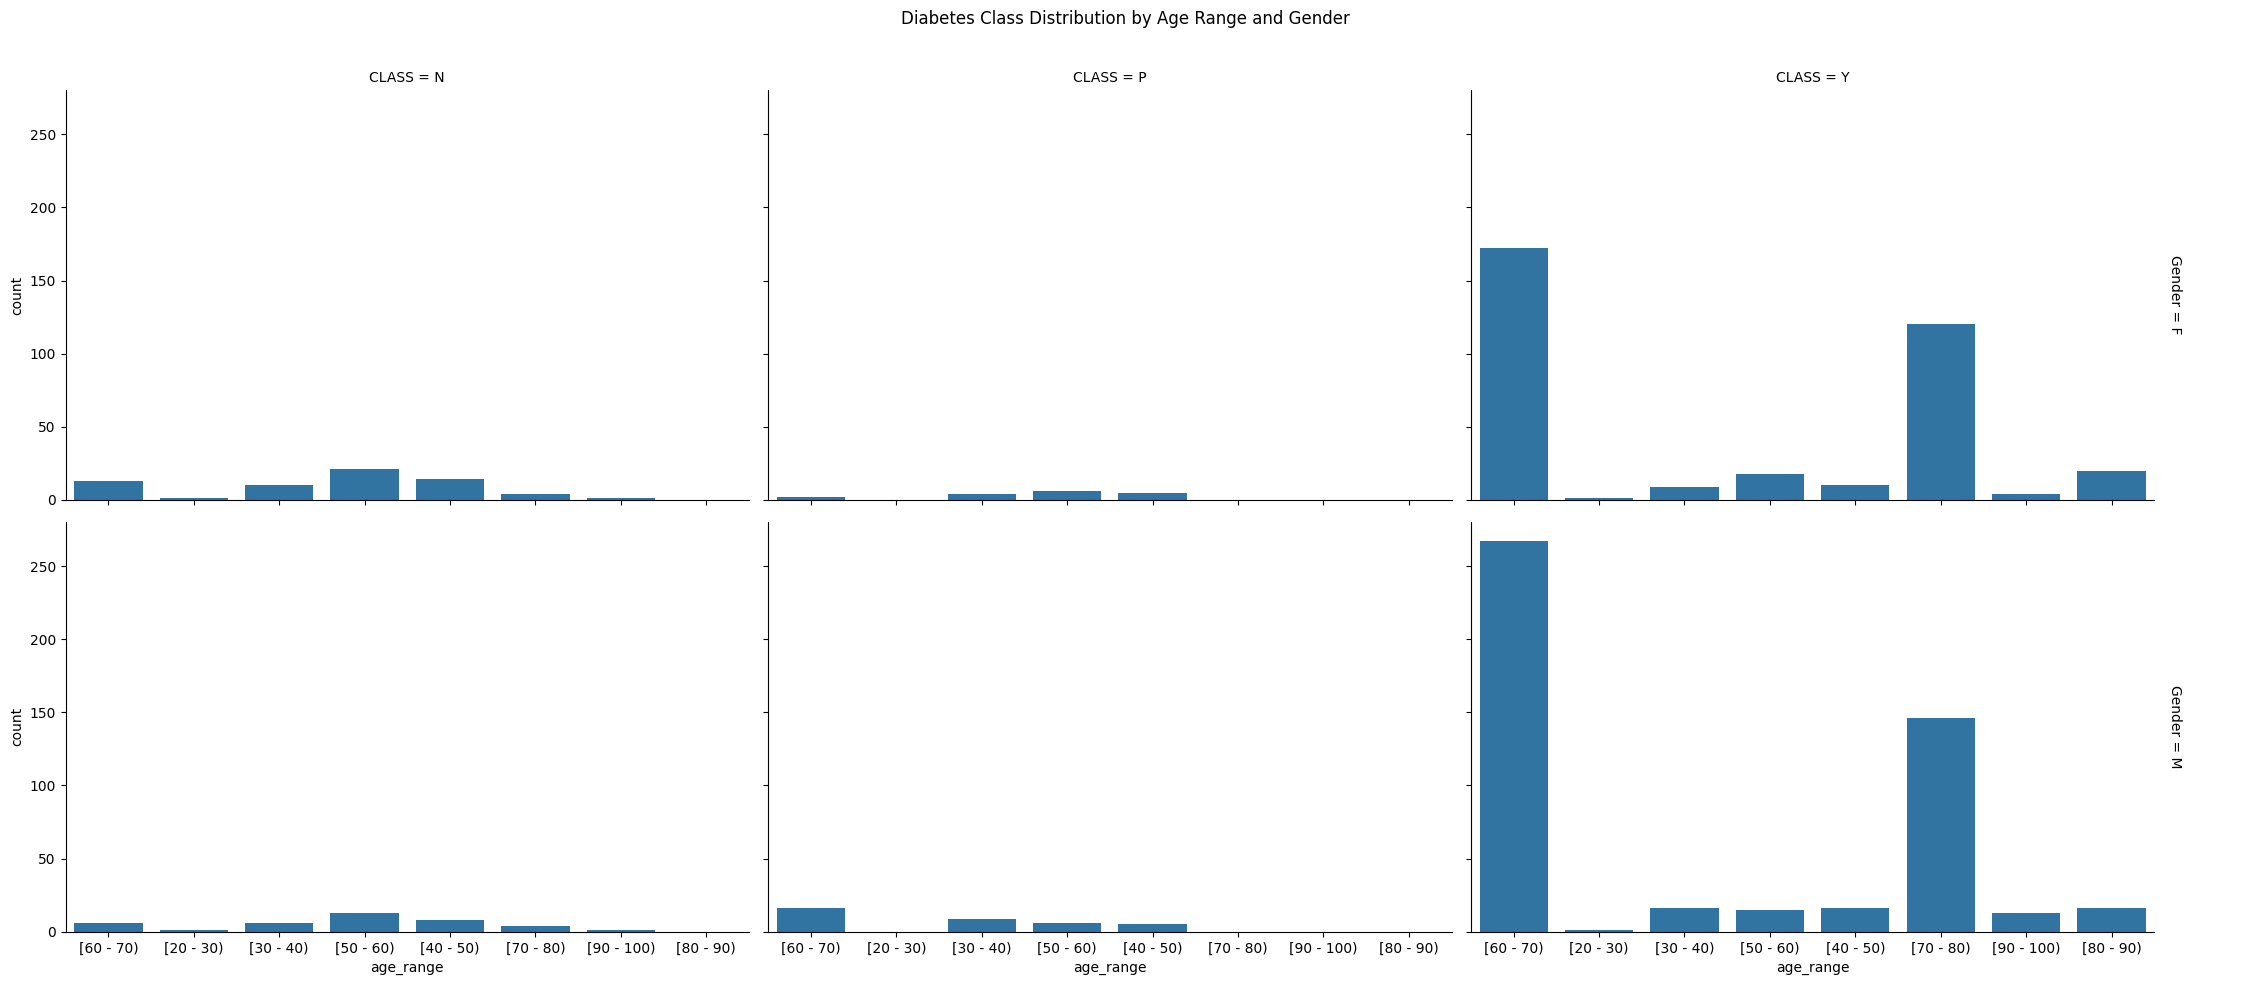

In [52]:
# Create a FacetGrid with a wider figure size
g = sns.FacetGrid(df, col="CLASS", row="Gender", margin_titles=True, height=5, aspect=1.5)
g.map_dataframe(sns.countplot, x="age_range", order=df['age_range'].unique())
g.add_legend()

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Diabetes Class Distribution by Age Range and Gender')
plt.show()



###Observation (by ChristineM)
For those that dont have diabetes, Female is a bit higher. in the Pre-diabetes, very minimal differences. but in those that have Diabetes, Male is higher than female

## Train Test Split

You should split your data into training and testing sets before applying any transformations, including scaling or standardization.

Reasoning:

Preventing Data Leakage: If you transform the entire dataset before splitting, information from the test set will influence the transformation applied to the training set. This is called data leakage and can lead to overly optimistic model performance estimates. The model might appear to perform well on the test set, but it's actually because it has already "seen" some information about the test set during the transformation process.

Real-World Simulation: When you deploy your model in the real world, it will encounter new, unseen data. By splitting before transformation, you simulate this scenario more accurately. The model is trained on a portion of the data and evaluated on a completely separate portion that it hasn't seen before, including during the transformation process

In [26]:
# Split data into features (X) and target (y)
X = df2.drop('CLASS', axis=1)
y = df2['CLASS']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 11)
X_test shape: (200, 11)
y_train shape: (800,)
y_test shape: (200,)


## Encode Categorical Variables

Encoding Types

Label Encoding: Assigning a unique integer to each category in a categorical feature. Recommended for ordinal features (features with a natural order) or when the number of categories is large and one-hot encoding would create too many features.
One-Hot Encoding: Creating a new binary feature for each category in a categorical feature. Recommended for nominal features (features with no natural order) and when the number of categories is small.
When to Use

Label Encoding: Use when the order of the categories matters, or when dealing with high-cardinality categorical features.
One-Hot Encoding: Use when the order of the categories doesn't matter, or when the number of unique categories is low.

In [27]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Gender' column
X_train['Gender'] = le.fit_transform(X_train['Gender'])
X_test['Gender'] = le.transform(X_test['Gender'])

# Fit and transform the 'age_range' column
X_train['age_range'] = le.fit_transform(X_train['age_range'])
X_test['age_range'] = le.transform(X_test['age_range'])

# Encode CLASS- y_train
# Fit and transform the target variable for the training set
y_train = le.fit_transform(y_train)

# Transform the target variable for the test set using the same encoder
y_test = le.transform(y_test)

In [28]:
X_train['Gender'].value_counts()

,count
Gender,
1,456
0,344


In [29]:
X_train['age_range'].value_counts()

,count
age_range,
4,379
5,223
3,67
2,44
1,44
6,28
7,12
0,3


In [30]:
X_train.head()

,Gender,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,age_range
29,0,4.3,49,4.0,5.6,1.4,1.4,3.6,0.6,22.0,3
535,1,2.7,38,8.8,4.8,1.3,1.7,1.6,2.0,26.0,4
695,1,2.9,35,11.5,4.9,2.1,2.3,1.8,0.8,33.0,6
557,1,3.2,49,6.7,4.6,1.2,1.3,2.8,0.5,30.2,4
836,0,5.9,74,12.4,5.5,1.3,1.6,1.7,1.9,27.0,4


In [31]:
scaler = MinMaxScaler()

In [32]:
columns_to_scale = ['Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']
columns_scaled = ['Urea_scaled','Cr_scaled','HbA1c_scaled','Chol_scaled','TG_scaled','HDL_scaled','LDL_scaled','VLDL_scaled','BMI_scaled']
scale_values = X_train[columns_to_scale].values
scaled_array = scaler.fit_transform(scale_values)
X_train_scaled = pd.DataFrame(scaled_array, columns=columns_scaled)
X_train_scaled.head()

,Urea_scaled,Cr_scaled,HbA1c_scaled,Chol_scaled,TG_scaled,HDL_scaled,LDL_scaled,VLDL_scaled,BMI_scaled
0,0.161702,0.054156,0.205298,0.565657,0.081481,0.123711,0.329787,0.014925,0.104348
1,0.093617,0.040302,0.523179,0.484848,0.074074,0.154639,0.117021,0.056716,0.243478
2,0.102128,0.036524,0.701987,0.494949,0.133333,0.216495,0.138298,0.020896,0.486957
3,0.114894,0.054156,0.384106,0.464646,0.066667,0.113402,0.244681,0.011940,0.389565
4,0.229787,0.085642,0.761589,0.555556,0.074074,0.144330,0.127660,0.053731,0.278261


###Observation (by ChristineM)
Creating a numerical equivalent for those categorical features, we can now normalize the data using MinMaxScaler

## Instantiate Models

In [33]:
models = []
models.append(('LR', LogisticRegression(solver ='lbfgs',multi_class='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('RFC', RandomForestClassifier(n_estimators=100)))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('XGB',XGBClassifier()))

In [34]:
results = []
names = []

## Cross Validation

Cross-validation is a resampling technique used to evaluate the performance of machine learning models on unseen data. This is done by partitioning the data into subsets, training the model on some of the data, and then testing it on the remaining data.

Why is Cross-Validation Important?

Prevent Overfitting: Models can sometimes perform very well on the data they were trained on but poorly on new data (overfitting). Cross-validation helps to assess how well a model generalizes to unseen data and reduces overfitting.
Model Selection: You can use cross-validation to compare different machine learning algorithms and choose the one that performs the best for your dataset.
Hyperparameter Tuning: Cross-validation is essential for finding the optimal values for hyperparameters (settings that control how a model learns) to further improve model performance.

In [35]:
from sklearn.model_selection import KFold, cross_val_score # Import necessary classes

In [36]:

# Define the number of folds for k-fold cross-validation
num_folds = 10

# Iterate through the models
for name, model in models:
  # Create a KFold object
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

  # Store the results
  results.append(cv_results)
  names.append(name)

  # Print the mean and standard deviation of the accuracy scores
  print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'mul

LR: 0.8475 (0.0382)
KNN: 0.8825 (0.0341)
NB: 0.9375 (0.0224)
SVC: 0.8387 (0.0342)
RFC: 0.9812 (0.0101)
DTR: 0.9713 (0.0148)
XGB: 0.9875 (0.0158)


###Observation (by ChristineM)
Even increasing the k-folds from 5 to 10, it is still the same XGB model shows the best accuracy result of 0.9875 (as per k=10)

## Make Predictions with best performing Model

In [37]:
# Since XGB is the best performing model based on the cross-validation results
best_model = XGBClassifier()

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = best_model.predict(X_test)

In [38]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [39]:
# Evaluate the performance of the best model on the test dataset
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model on the test dataset: {accuracy:.4f}")

Accuracy of the best model on the test dataset: 0.9850


In [40]:
# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)




              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.86      1.00      0.92         6
           2       0.99      0.99      0.99       173

    accuracy                           0.98       200
   macro avg       0.93      0.98      0.96       200
weighted avg       0.99      0.98      0.99       200

Confusion Matrix:
[[ 20   0   1]
 [  0   6   0]
 [  1   1 171]]


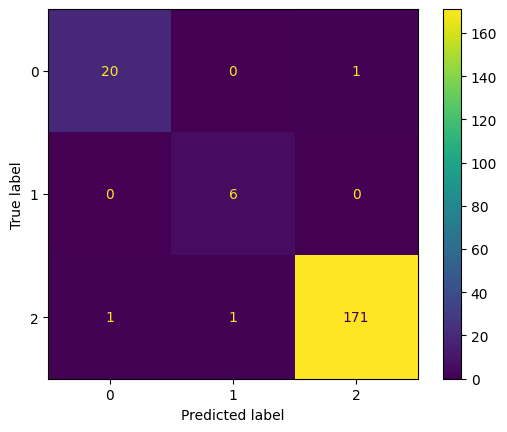

In [41]:
# You can also visualize the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

###Trying the 2nd best ML model: (ChristineM)
RFC (Randon Forest Classifier) with 0.9812

In [53]:
# Since XGB is the best performing model based on the cross-validation results
best_model = RandomForestClassifier()

# Train the best model on the entire training dataset
best_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = best_model.predict(X_test)

In [54]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [55]:
# Evaluate the performance of the best model on the test dataset
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the best model on the test dataset: {accuracy:.4f}")

Accuracy of the best model on the test dataset: 0.9900


In [56]:
# Generate classification report and confusion matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         6
           2       0.99      0.99      0.99       173

    accuracy                           0.99       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[ 20   0   1]
 [  0   6   0]
 [  1   0 172]]


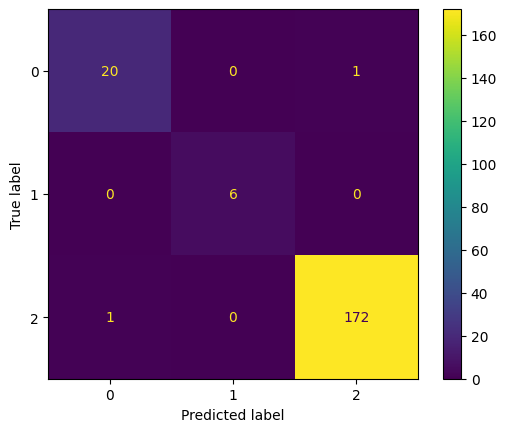

In [57]:
# You can also visualize the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

###Observation (ChristineM)
From the 1st model (XGB) we got 98.5% accuracy on the Test data, but when we change the model to RFC, it goes up to 99%, with that 1 predicted value of 1 (with True value to be 2) was correctly now predicted to be the same as true value.

## Interview Readiness

Review the healthcare data set

Carry out EDA in your own notebook

What insights did you derive from the EDA

Carry out ML Modelling

What Machine learning problems were solved

Evaluate your model.

What was your best performing model

Upload your notebook to Moodle.

Create a Github Repo for this Project- create a README file

Upload a link to your repo to Moodle

Link to Github as Markdown at the top line of Notebook.






